In [88]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv('wine.xls')
df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [19]:
df.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [20]:
df.rename(columns={'1':'Target','14.23':'Alcohol','1.71':'Malic_Acid','2.43':'Ash','15.6':'Alcanlity','127':'Magnesium','2.8':'Total_phe','3.06':'Flavanids','.28':'Non-Flav','2.29':'Proantho','5.64':'Color_inten','1.04':'Hue','3.92':'OD280','1065':'Proline'},inplace=True)

In [21]:
df['Target'].value_counts()

2    71
1    58
3    48
Name: Target, dtype: int64

In [22]:
df.isnull().sum()

Target         0
Alcohol        0
Malic_Acid     0
Ash            0
Alcanlity      0
Magnesium      0
Total_phe      0
Flavanids      0
Non-Flav       0
Proantho       0
Color_inten    0
Hue            0
OD280          0
Proline        0
dtype: int64

In [23]:
df.dtypes

Target           int64
Alcohol        float64
Malic_Acid     float64
Ash            float64
Alcanlity      float64
Magnesium        int64
Total_phe      float64
Flavanids      float64
Non-Flav       float64
Proantho       float64
Color_inten    float64
Hue            float64
OD280          float64
Proline          int64
dtype: object

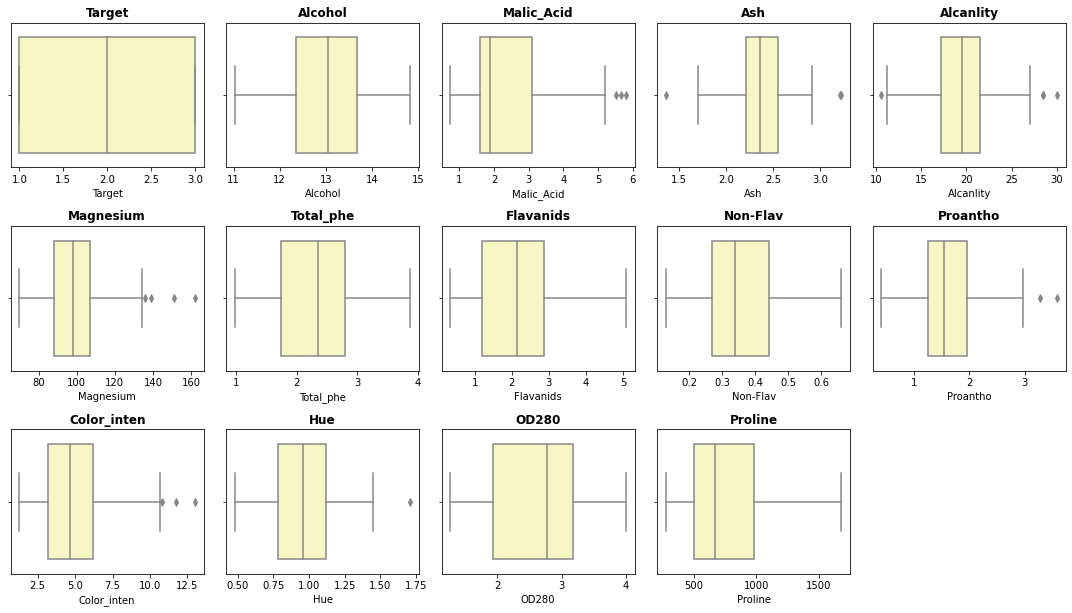

In [25]:
# Befor outliers.
n=1
plt.figure(figsize=(15,11))
for i in df.describe().columns:
    plt.subplot(4,5,n)
    n+=1
    sns.boxplot(df[i],palette='Spectral')
    plt.title(i,weight='bold')
    plt.tight_layout()

In [42]:
#Optimal number of clusters
wcss=[]
n=np.arange(1,10)
for i in n:
    k_model=KMeans(n_clusters=i,random_state=10)
    k_model.fit(df)
    wcss.append(k_model.inertia_)

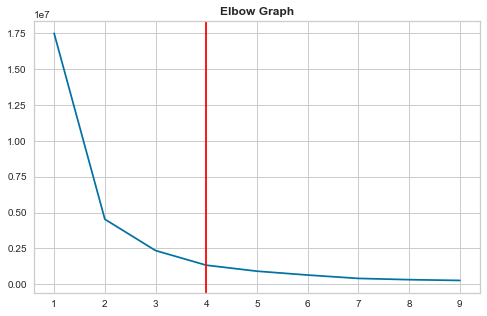

In [104]:
# Ploting of clusters
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,10),wcss)
plt.title('Elbow Graph',weight='bold')
plt.axvline(x=4,color='red')
plt.show()

In [36]:
# Interpretation is 4-clustered are suitable for model.

In [45]:
n_clu=np.arange(2,10)
score1=[]
for i in n_clu:
    k_model=KMeans(n_clusters=i,random_state=10)
    predict=k_model.fit_predict(df)
    score=silhouette_score(df,predict,random_state=10)
    score1.append(score)
    print('For Cluster {}, the silhouette score is {}'.format(i,score))

For Cluster 2, the silhouette score is 0.6567163270793849
For Cluster 3, the silhouette score is 0.5709621417552556
For Cluster 4, the silhouette score is 0.5586865873752144
For Cluster 5, the silhouette score is 0.5473884813706026
For Cluster 6, the silhouette score is 0.5642207424314178
For Cluster 7, the silhouette score is 0.5601757034854953
For Cluster 8, the silhouette score is 0.5354429720895041
For Cluster 9, the silhouette score is 0.5288500334122168


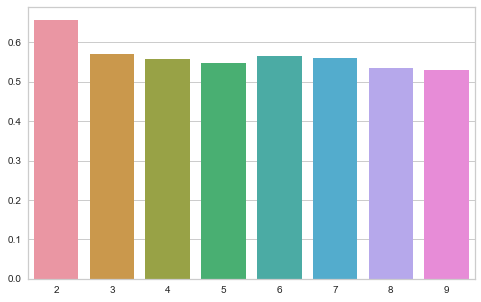

In [105]:
# Bareplot for silhouette values.
plt.figure(figsize=(8,5))
sns.barplot(x=n_clu,y=score1)
plt.show()

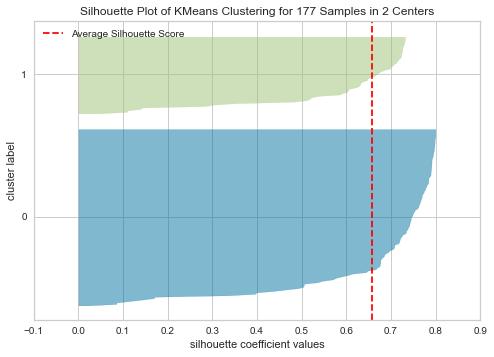

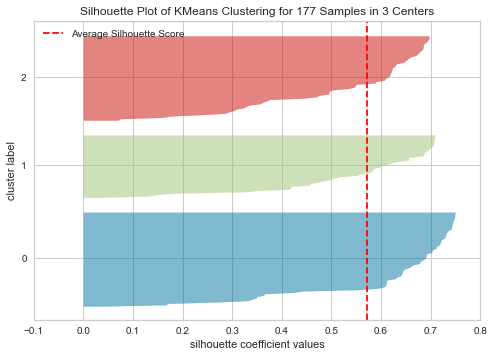

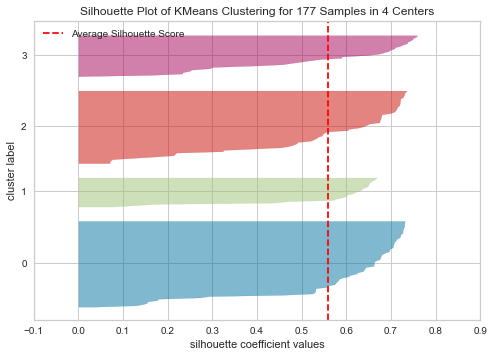

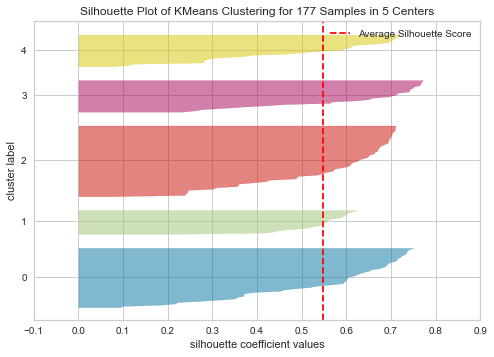

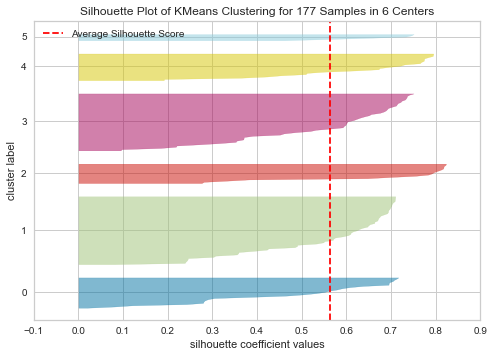

In [49]:
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
X, y = load_credit()
X = df
n=[2,3,4,5,6]
for i in n:
    silhouette_visualizer(KMeans(i, random_state=42), X, colors='yellowbrick')
    i+=1

In [50]:
# From above graph,for cluster 2 ,silhouette is around 0.68.

In [52]:
# Agglomerative Model.
link_list=['ward', 'complete', 'average', 'single']
for i in link_list:
    agl_model=AgglomerativeClustering(n_clusters=2,linkage=i)
    predict=agl_model.fit_predict(df)
    score=silhouette_score(df,predict,random_state=10)
    print('For linkage {}, the silhouette score is {}'.format(i,score))

For linkage ward, the silhouette score is 0.6594785600189589
For linkage complete, the silhouette score is 0.6429097058446719
For linkage average, the silhouette score is 0.6594785600189589
For linkage single, the silhouette score is 0.5403908200782188


In [53]:
# So, linkage ward are given suitable silhouette score.

In [54]:
# Creating Clusters.
clusters=AgglomerativeClustering(n_clusters=2,linkage='ward')
clusters.fit(df)

AgglomerativeClustering()

In [55]:
df['Cluster']=clusters.labels_

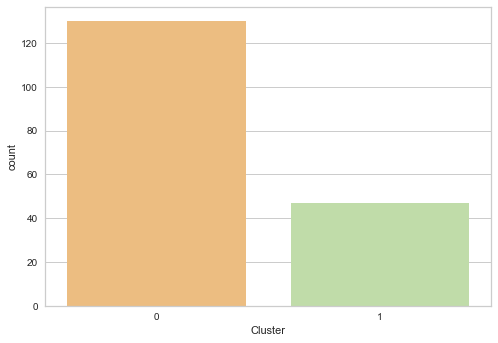

In [63]:
# Visualise Clusters.
sns.countplot(df['Cluster'],palette='Spectral')
plt.show()

In [65]:
# PCA Model Creation.

In [67]:
cov_mat=np.cov(df.T)
print(cov_mat[5])

[-2.18252440e+00  2.96623909e+00 -7.78171867e-01  1.11942925e+00
 -3.39069723e+00  2.00902799e+02  1.84872143e+00  2.64841808e+00
 -4.45402863e-01  1.83492777e+00  6.56750329e+00  1.69021379e-01
  4.69337763e-01  1.72966484e+03  1.78059194e+00]


In [68]:
eig_val,eig_vec=np.linalg.eig(cov_mat)
print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [9.91859724e+04 1.70864149e+02 9.52892701e+00 5.13173394e+00
 1.29217935e+00 8.72607093e-01 2.88363954e-01 1.55957683e-01
 1.12035047e-01 8.78865738e-02 8.08712810e-03 2.08751476e-02
 3.11746544e-02 4.70450088e-02 4.36251858e-02] 

Eigenvectors: 
 
 [[-1.55124234e-03  3.15491374e-03  1.00657831e-01  1.47647583e-01
  -2.18765368e-01 -1.68954144e-01  1.80273095e-01 -1.90472413e-01
   1.73846665e-01 -5.02688102e-01 -5.02822151e-02  9.81424532e-02
  -3.22622528e-01 -5.24935596e-01 -3.84906490e-01]
 [ 1.64639921e-03  7.17566187e-04  1.98684282e-02  1.36566155e-01
   4.70184766e-02  2.00433673e-01 -8.86392164e-01 -3.52510658e-01
   7.57173836e-02 -7.73293195e-02 -1.41997464e-02 -5.55311393e-03
   1.69007202e-02 -4.02257149e-02 -1.21504403e-01]
 [-6.73506735e-04  2.50585364e-03  1.24538776e-01  1.56582644e-01
  -5.29765831e-01  8.03457435e-01  1.45124592e-01  7.51282107e-02
   1.41395476e-02  3.62135507e-02  1.24400707e-02  6.32085373e-02
   2.68846888e-02 -2.24447571e-03  2.

In [70]:
eig_val=list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

# From eigen values,first 5 columns are suitable for PCA model.

[99185.9724403597, 170.86414928405026, 9.528927009991568, 5.13173394468987, 1.2921793507260613, 0.8726070928898378, 0.2883639535429386, 0.15595768333737245, 0.11203504739077472, 0.08788657379052962, 0.04704500883950198, 0.043625185802621945, 0.03117465442695393, 0.020875147561862234, 0.00808712809944525]


In [73]:
eigen_vec=eig_vec[:,[0,1,2,3,4]]
eigen_vec

array([[-1.55124234e-03,  3.15491374e-03,  1.00657831e-01,
         1.47647583e-01, -2.18765368e-01],
       [ 1.64639921e-03,  7.17566187e-04,  1.98684282e-02,
         1.36566155e-01,  4.70184766e-02],
       [-6.73506735e-04,  2.50585364e-03,  1.24538776e-01,
         1.56582644e-01, -5.29765831e-01],
       [ 1.94876473e-04,  4.67131498e-03,  5.14019852e-02,
        -1.21554384e-02,  2.54353227e-02],
       [-4.62714624e-03,  2.87376714e-02,  9.27523976e-01,
        -3.58583797e-01,  6.81672084e-02],
       [ 1.74714976e-02,  9.99272922e-01, -3.24432430e-02,
        -4.53901614e-03, -5.80134260e-03],
       [ 9.86351531e-04,  7.44384132e-04, -4.27095591e-02,
        -7.65182261e-02,  3.20149011e-01],
       [ 1.55753920e-03, -4.57734558e-04, -8.98666581e-02,
        -1.72357462e-01,  5.35414257e-01],
       [-1.22303352e-04, -1.34221518e-03,  1.37875316e-02,
         1.05770235e-02, -2.94424612e-02],
       [ 5.91286946e-04,  4.70836724e-03, -2.56324179e-02,
        -5.17507817e-02

In [74]:
df1=pd.DataFrame(data=eigen_vec,columns=['PC1','PC2','PC3','PC4','PC5'])
df1.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-0.001551,0.003155,0.100658,0.147648,-0.218765
1,0.001646,0.000718,0.019868,0.136566,0.047018
2,-0.000674,0.002506,0.124539,0.156583,-0.529766
3,0.000195,0.004671,0.051402,-0.012155,0.025435
4,-0.004627,0.028738,0.927524,-0.358584,0.068167


In [75]:
# PCA Model by inbuilt Function

pca_model=PCA(n_components=5,random_state=10)
components=pca_model.fit_transform(df)

In [76]:
df2=pd.DataFrame(data=components,columns=['PC1','PC2','PC3','PC4','PC5'])
df2.head(5)

,PC1,PC2,PC3,PC4,PC5
0,304.900626,-5.141431,6.843793,-1.011362,-0.471656
1,439.864985,-6.240731,-1.034868,0.981438,0.464964
2,735.040711,0.606790,-0.880996,-0.531322,0.886044
3,-9.777803,18.605834,-0.365282,1.510056,0.506332
4,705.031944,0.066120,0.979923,-0.416302,0.124822


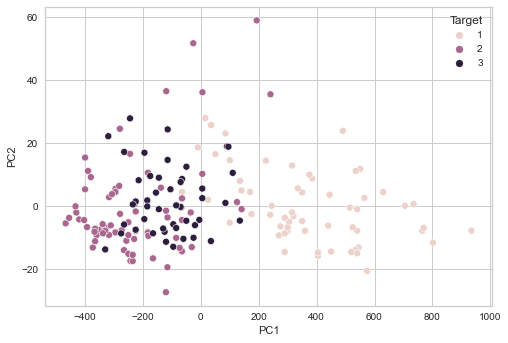

In [79]:
# Data Visualization.
target=df['Target']

visual=pd.concat([df2,target],axis=1)

sns.scatterplot(x='PC1',y='PC2',hue='Target',data=visual)
plt.show()

In [83]:
# Build the classification model.
x_train,x_test,y_train,y_test=train_test_split(df2,df['Target'],test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(123, 5)
(54, 5)
(123,)
(54,)


In [84]:
random_model=RandomForestClassifier(random_state=10)
random_model.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [85]:
y_pred=random_model.predict(x_test)
print('Accuracy of model is:',accuracy_score(y_test,y_pred))

Accuracy of model is: 0.9074074074074074


In [86]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred=decision_tree.predict(x_test)
print('Accuracy od decision model is:',accuracy_score(y_test,y_pred))

Accuracy od decision model is: 0.9074074074074074


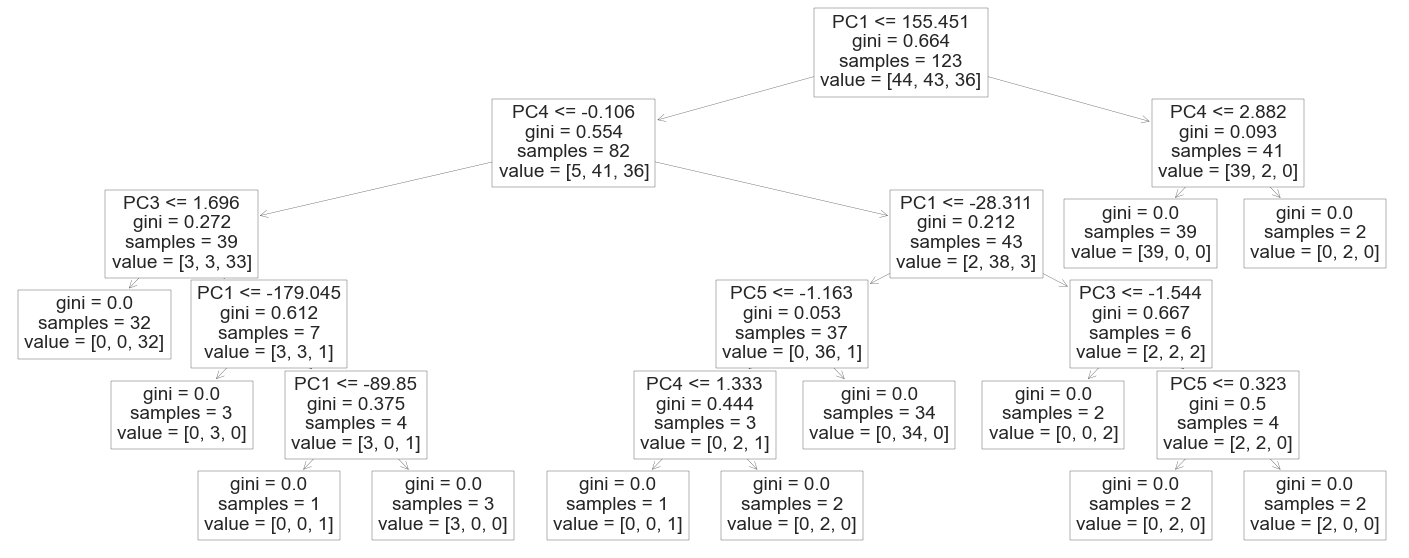

In [90]:
plt.figure(figsize=(25,10))
_=tree.plot_tree(decision_tree,feature_names=x_train.columns)

Text(0.5, 1.0, 'Decision Tree Coeff')

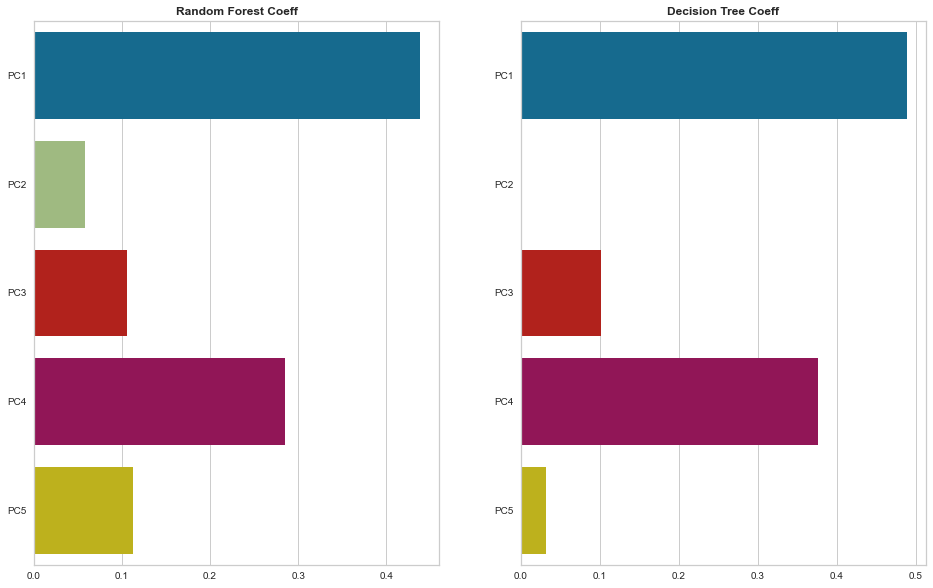

In [106]:
# Visualize the coefficients
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.barplot(x=random_model.feature_importances_,y=x_train.columns)
plt.title('Random Forest Coeff',weight='bold')
plt.subplot(1,2,2)
sns.barplot(x=decision_tree.feature_importances_,y=x_train.columns)
plt.title('Decision Tree Coeff',weight='bold')